<a href="https://colab.research.google.com/github/saisrigundam/GB656_Titanic/blob/main/Gundam_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# SaiKrishnaSriGundam


from google.colab import drive
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import io
import numpy as np
import pandas as pd

In [ ]:
drive.mount("/content/ML_Project")

Mounted at /content/ML_Project


In [ ]:
df_train = pd.read_csv("/content/ML_Project/MyDrive/train.csv")
df_test = pd.read_csv("/content/ML_Project/MyDrive/test.csv")
df_gs = pd.read_csv("/content/ML_Project/MyDrive/gender_submission.csv")

In [ ]:
print("Training Dataset Shape: ", df_train.shape)
print("Testing Dataset Shape : ", df_test.shape)

Training Dataset Shape:  (891, 12)
Testing Dataset Shape :  (418, 11)


In [ ]:
df_total = df_train.drop(['Survived'], axis=1)
df_total = df_total.append(df_test)
prefixes = set()
for name in df_total['Name']:
  prefixes.add(name.split(',')[1].split('.')[0].strip())
prefixes = list(prefixes)
mapper = {'Major': 0, 'Jonkheer': 1, 'Dona': 1, 'Mme': 2, 'the Countess': 1,
          'Dr': 0, 'Sir': 1, 'Mrs': 2, 'Lady': 1, 'Miss': 3, 'Col': 0,
          'Capt': 0, 'Mlle': 3, 'Rev': 0, 'Mr': 4, 'Master': 5, 'Ms': 2,
          'Don': 1
          }
df_total['Name'] = df_total['Name'].map(lambda x: mapper[x.split(',')[1].split('.')[0].strip()])

In [ ]:
columns = df_train.columns.to_list()
print("List of fields in the data: \n")
for i in range(len(columns)):
  print(" {}: {}".format("%2s" % (i+1), columns[i]))

List of fields in the data: 

  1: PassengerId
  2: Survived
  3: Pclass
  4: Name
  5: Sex
  6: Age
  7: SibSp
  8: Parch
  9: Ticket
 10: Fare
 11: Cabin
 12: Embarked


In [ ]:
# Checking missing values in the dataset
null_counts = df_train.isnull().sum().to_list()
longest_col_len = max(list(map(lambda x: len(x), columns)))
print("Number of missing values for each field in the training dataset: \n")
for i in range(len(columns)):
  print(" {}: {}: {}".format("%2s" % (i+1),
                             "%-{}s".format(longest_col_len + 1) % columns[i],
                             null_counts[i]))

Number of missing values for each field in the training dataset: 

  1: PassengerId : 0
  2: Survived    : 0
  3: Pclass      : 0
  4: Name        : 0
  5: Sex         : 0
  6: Age         : 177
  7: SibSp       : 0
  8: Parch       : 0
  9: Ticket      : 0
 10: Fare        : 0
 11: Cabin       : 687
 12: Embarked    : 2


In [ ]:
# Checking missing values in the dataset
columns = df_test.columns.to_list()
null_counts = df_test.isnull().sum().to_list()
longest_col_len = max(list(map(lambda x: len(x), columns)))
print("Number of missing values for each field in the testing dataset: \n")
for i in range(len(columns)):
  print(" {}: {}: {}".format("%2s" % (i+1),
                             "%-{}s".format(longest_col_len + 1) % columns[i],
                             null_counts[i]))

Number of missing values for each field in the testing dataset: 

  1: PassengerId : 0
  2: Pclass      : 0
  3: Name        : 0
  4: Sex         : 0
  5: Age         : 86
  6: SibSp       : 0
  7: Parch       : 0
  8: Ticket      : 0
  9: Fare        : 1
 10: Cabin       : 327
 11: Embarked    : 0


In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# df_train.Survived.value_counts().sort_values().plot(kind = 'bar', color = ["lightgreen","tomato"])

In [ ]:
# df_train.Sex.value_counts().sort_values().plot(kind = 'bar', color = ["pink","skyblue"])

In [ ]:
# df_train.Pclass.value_counts().sort_values().plot(kind = "bar", color = ["grey"])

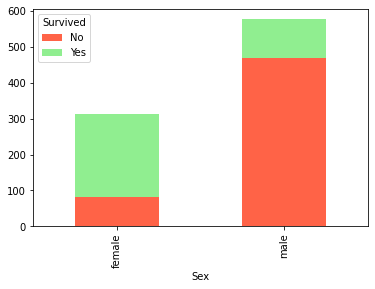

In [ ]:
df_train.loc[df_train.Survived == 0, 'Survived'] = "No"
df_train.loc[df_train.Survived == 1, 'Survived'] = "Yes"
df_train.groupby(['Sex', 'Survived'])['PassengerId'].count().unstack().plot(kind = "bar", stacked=True, color = ["tomato", "lightgreen"])

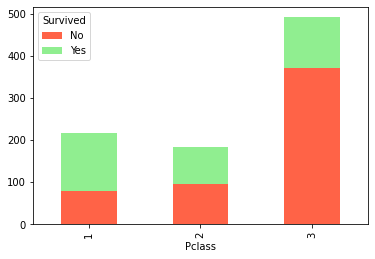

In [ ]:
df_train.groupby(["Pclass", "Survived"])['PassengerId'].count().unstack().plot(kind = "bar", stacked=True, color = ["tomato", "lightgreen"])

In [ ]:
# df = df_train
# df = df.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1)
# df['Name'] = df['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())
# df['Fare'].fillna(df[df['Pclass']==3]['Fare'].median(), inplace=True)
# df_group = df.groupby(['Sex', 'Pclass', 'Name'])
# df_group = df_group.median()
# df_group = df_group.reset_index()[['Sex', 'Pclass', 'Name', 'Age']]
# condition = ((df_group['Sex'] == row['Sex']) & (df_group['Name'] == row['Name']) & (df_group['Pclass'] == row['Pclass']))
# df.head()

In [ ]:
def compute_age(row):
  df_group = df_total.groupby(['Sex', 'Pclass', 'Name'])
  df_group = df_group.median()
  df_group = df_group.reset_index()[['Sex', 'Pclass', 'Name', 'Age']]
  condition = ((df_group['Sex'] == row['Sex']) & (df_group['Name'] == row['Name']) & (df_group['Pclass'] == row['Pclass']))
  return df_group[condition]['Age'].values[0]


def preprocess(df):
  # Dropping the columns that we think are not of much use

  # Dropping PassengerId, Name and Ticket because they are unique for each passenger.
  # Dropping Cabin because 687 out of 891 rows are empty.
  df = df.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1)
  df['Name'] = df['Name'].map(lambda x: mapper[x.split(',')[1].split('.')[0].strip()])
  df['Fare'].fillna(df[df['Pclass']==3]['Fare'].median(), inplace=True)

  # Filling age nan values with median values
  # df['Age'].fillna(df['Age'].median(), inplace=True)
  df['Age'] = df.apply(lambda row: compute_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
  df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
  # df['Age'].fillna((df['Age'].mean()), inplace=True)
  df = df.dropna()
  df.Sex = df.Sex.map({'female':0, 'male':1})
  df.Embarked = df.Embarked.map({'C':0, 'S':1, 'Q':2})
  if ('Survived' in df.columns.to_list()):
    df.Survived = df.Survived.map({'No':0, 'Yes':1})
  # df.Age = (df.Age - min(df.Age)) / (max(df.Age) - min(df.Age))
  # df.Fare = (df.Fare - min(df.Fare)) / (max(df.Fare) - min(df.Fare))

  return df

In [ ]:
# df_test_final = preprocess(df_test)
# df_test_final[df_test_final['Age'].isna()]
# x = df_total.groupby(['Sex', 'Pclass', 'Name']).median()
# x

In [ ]:
# df_total.groupby(['Sex', 'Pclass', 'Name'])
df_train_final = preprocess(df_train)
df_train_final.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
FamilySize    0
dtype: int64

In [ ]:
df_train_final.describe()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,3.457818,0.649044,29.161046,0.524184,0.382452,32.096681,0.897638,1.906637
std,0.486260,0.834700,0.948368,0.477538,13.525150,1.103705,0.806761,49.697504,0.515181,1.614703
min,0.000000,1.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,3.000000,0.000000,21.000000,0.000000,0.000000,7.895800,1.000000,1.000000
50%,0.000000,3.000000,4.000000,1.000000,26.000000,0.000000,0.000000,14.454200,1.000000,1.000000
75%,1.000000,3.000000,4.000000,1.000000,36.000000,1.000000,0.000000,31.000000,1.000000,2.000000
max,1.000000,3.000000,5.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,11.000000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df_train_final.drop(['Survived'], axis=1),
    df_train_final.Survived,
    test_size= 0.2,
    random_state=119,
    stratify=df_train_final.Survived
)

In [ ]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
Y_pred = clf.predict(X_test)
accuracy_score(y_test, Y_pred)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8089887640449438

In [ ]:
import math
clf_linear = LinearRegression()
clf_linear.fit(X_train, y_train)
Y_pred = clf_linear.predict(X_test)
f = lambda x: 0 if x < 0.6 else 1
Y = np.array(list(map(f, Y_pred)))
accuracy_score(y_test, Y)

0.8146067415730337

In [ ]:
from sklearn.ensemble import RandomForestRegressor
clf_rf = RandomForestRegressor()
clf_rf.fit(X_train, y_train)
Y_pred = clf_rf.predict(X_test)
f = lambda x: 0 if x < 0.6 else 1
Y = np.array(list(map(f, Y_pred)))
accuracy_score(y_test, Y)

0.8651685393258427

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
Y_pred = clf_dt.predict(X_test)
f = lambda x: 0 if x < 0.5 else 1
Y = np.array(list(map(f, Y_pred)))
accuracy_score(y_test, Y)

0.797752808988764

In [ ]:
from sklearn import svm
clf_svm = svm.SVC()
clf_svm.fit(X_train, y_train)
Y_pred = clf_svm.predict(X_test)
accuracy_score(y_test, Y_pred)

0.6910112359550562

In [ ]:
clf_lsvm = svm.SVR()
clf_lsvm.fit(X_train, y_train)
Y_pred = clf_lsvm.predict(X_test)
f = lambda x: 0 if x < 0.6 else 1
Y = np.array(list(map(f, Y_pred)))
accuracy_score(y_test, Y)

0.6910112359550562

In [ ]:
from sklearn.neural_network import MLPClassifier
clf_nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf_nn.fit(X_train, y_train)
Y_pred = clf_nn.predict(X_test)
accuracy_score(y_test, Y_pred)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.8426966292134831

In [ ]:
from sklearn.model_selection import cross_val_score

clf = LogisticRegression()
scores = cross_val_score(clf, df_train_final.drop(['Survived'], axis=1), df_train_final.Survived, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.79 accuracy with a standard deviation of 0.01


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [ ]:
clf_rf = RandomForestRegressor()
scores = cross_val_score(clf_rf, df_train_final.drop(['Survived'], axis=1), df_train_final.Survived, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.37 accuracy with a standard deviation of 0.07


In [ ]:
clf_dt = DecisionTreeClassifier()
scores = cross_val_score(clf_dt, df_train_final.drop(['Survived'], axis=1), df_train_final.Survived, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.79 accuracy with a standard deviation of 0.02


In [ ]:
clf_svm = svm.SVC()
scores = cross_val_score(clf_svm, df_train_final.drop(['Survived'], axis=1), df_train_final.Survived, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.68 accuracy with a standard deviation of 0.05


In [ ]:
clf_lsvm = svm.SVR()
scores = cross_val_score(clf_lsvm, df_train_final.drop(['Survived'], axis=1), df_train_final.Survived, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.08 accuracy with a standard deviation of 0.14


In [ ]:
clf_nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
scores = cross_val_score(clf_nn, df_train_final.drop(['Survived'], axis=1), df_train_final.Survived, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

0.75 accuracy with a standard deviation of 0.06


In [ ]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df_test_process = preprocess(df_test)
clf_rf = RandomForestRegressor()
clf_rf.fit(df_train_final.drop(['Survived'], axis=1), df_train_final.Survived)
Y_pred = clf_rf.predict(df_test_process)
f = lambda x: 0 if x < 0.5 else 1
predictions = np.array(list(map(f, Y_pred)))
predictions

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
df_final = pd.DataFrame({"PassengerId": df_test["PassengerId"], "Survived": predictions})

In [ ]:
df_final.to_csv('ML_Project_rf.csv', index=False)

In [ ]:
clf_svm = svm.SVC()
clf_svm.fit(df_train_final.drop(['Survived'], axis=1), df_train_final.Survived)
Y_pred = clf_svm.predict(df_test_process)
Y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
df_svc = pd.DataFrame({"PassengerId": df_test["PassengerId"], "Survived": Y_pred})

In [ ]:
df_final.to_csv('ML_Project_svc.csv', index=False)

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel

In [ ]:

targets = y_train
logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()

models = [logreg, logreg_cv, rf, gboost]

model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(X_train)
print(train_reduced.shape)

def compute_score(clf, X, y, scoring='accuracy'):
  xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
  return np.mean(xval)

for model in models:
  print('Cross-validation of : {0}'.format(model.__class__))
  score = compute_score(clf=model, X=train_reduced, y=targets, scoring='accuracy')
  print('CV score = {0}'.format(score))
  print('****')


parameter_grid = {
    'max_depth' : [4, 6, 8],
    'n_estimators': [50, 10],
    'max_features': ['sqrt', 'auto', 'log2'],
    'min_samples_split': [2, 3, 10],
    'min_samples_leaf': [1, 3, 10],
    'bootstrap': [True, False],
    }
forest = RandomForestClassifier()
cross_validation = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(forest, scoring='accuracy', param_grid=parameter_grid, cv=cross_validation, verbose=1)

grid_search.fit(train, targets)
model = grid_search
parameters = grid_search.best_params_

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))



parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 10,
  'min_samples_split': 10, 'max_features': 'log2', 'max_depth': 6}

model = RandomForestClassifier(**parameters)
model.fit(train, targets)

output = model.predict(test).astype(int)
df_output = pd.DataFrame()
aux = pd.read_csv('/content/ML_Project/MyDrive/test.csv')
df_output['PassengerId'] = aux['PassengerId']
df_output['Survived'] = output
df_output[['PassengerId','Survived']].to_csv('rf.csv', index=False)


In [ ]:
data = pd.read_csv("/content/ML_Project/MyDrive/train.csv")
# data['Age'] = data['Age'].fillna(data['Age'].median())
# data['Died'] = 1 - data['Survived']
# data.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7), stacked=True, colors=['g', 'r']);

train = pd.read_csv("/content/ML_Project/MyDrive/train.csv")
test = pd.read_csv("/content/ML_Project/MyDrive/test.csv")
targets = train.Survived
train.drop(['Survived'], 1, inplace=True)
# combined = combined.drop(['Ticket', 'Cabin'], axis=1)
# combined.Embarked = combined.Embarked.map({'C':0, 'S':1, 'Q':2})
train = train.drop(['Ticket', 'Cabin'], axis=1)
# train.Embarked = train.Embarked.map({'C':0, 'S':1, 'Q':2})
test = test.drop(['Ticket', 'Cabin'], axis=1)
# test.Embarked = test.Embarked.map({'C':0, 'S':1, 'Q':2})
combined = train.append(test)
combined.reset_index(inplace=True)
combined.drop(['index', 'PassengerId'], inplace=True, axis=1)


titles = set()
for name in data['Name']:
  titles.add(name.split(',')[1].split('.')[0].strip())

Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
combined['Title'] = combined.Title.map(Title_Dictionary)


combined[combined['Title'].isnull()]

grouped_train = combined.iloc[:891].groupby(['Sex','Pclass','Title'])
grouped_median_train = grouped_train.median()
grouped_median_train = grouped_median_train.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]

grouped_median_train.head()

def fill_age(row):
  condition = (
      (grouped_median_train['Sex'] == row['Sex']) &
      (grouped_median_train['Title'] == row['Title']) &
      (grouped_median_train['Pclass'] == row['Pclass'])
      )
  return grouped_median_train[condition]['Age'].values[0]


combined['Age'] = combined.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)

combined.drop('Name', axis=1, inplace=True)
titles_dummies = pd.get_dummies(combined['Title'], prefix='Title')
combined = pd.concat([combined, titles_dummies], axis=1)
combined.drop('Title', axis=1, inplace=True)


combined.Fare.fillna(combined.iloc[:891].Fare.mean(), inplace=True)


combined['Sex'] = combined['Sex'].map({'male':1, 'female':0})

combined.Embarked.fillna('S', inplace=True)
embarked_dummies = pd.get_dummies(combined['Embarked'], prefix='Embarked')
combined = pd.concat([combined, embarked_dummies], axis=1)
combined.drop('Embarked', axis=1, inplace=True)


combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1

# introducing other features based on the family size
combined['Singleton'] = combined['FamilySize'].map(lambda s: 1 if s == 1 else 0)
combined['SmallFamily'] = combined['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
combined['LargeFamily'] = combined['FamilySize'].map(lambda s: 1 if 5 <= s else 0)

<ipython-input-34-cd565fedae1c>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  train.drop(['Survived'], 1, inplace=True)


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV


def compute_score(clf, X, y, scoring='accuracy'):
  xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
  return np.mean(xval)

def recover_train_test_target():
  global combined

  targets = data.Survived
  train = combined.iloc[:891]
  test = combined.iloc[891:]

  return train, test, targets

train, test, targets = recover_train_test_target()


In [ ]:
combined

,Pclass,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,FamilySize,Singleton,SmallFamily,LargeFamily
0,3,1,22.0,1,0,7.2500,0,0,1,0,0,0,0,0,1,2,0,1,0
1,1,0,38.0,1,0,71.2833,0,0,0,1,0,0,1,0,0,2,0,1,0
2,3,0,26.0,0,0,7.9250,0,1,0,0,0,0,0,0,1,1,1,0,0
3,1,0,35.0,1,0,53.1000,0,0,0,1,0,0,0,0,1,2,0,1,0
4,3,1,35.0,0,0,8.0500,0,0,1,0,0,0,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,1,26.0,0,0,8.0500,0,0,1,0,0,0,0,0,1,1,1,0,0
1305,1,0,39.0,0,0,108.9000,0,0,0,0,0,0,1,0,0,1,1,0,0
1306,3,1,38.5,0,0,7.2500,0,0,1,0,0,0,0,0,1,1,1,0,0
1307,3,1,26.0,0,0,8.0500,0,0,1,0,0,0,0,0,1,1,1,0,0


In [ ]:

clf = RandomForestClassifier(n_estimators=10, max_features='sqrt')
clf = clf.fit(train, targets)

model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(train)
print(train_reduced.shape)

test_reduced = model.transform(test)
print(test_reduced.shape)

logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()

models = [logreg, logreg_cv, rf, gboost]

for model in models:
  print('Cross-validation of : {0}'.format(model.__class__))
  score = compute_score(clf=model, X=train_reduced, y=targets, scoring='accuracy')
  print('CV score = {0}'.format(score))
  print('****')


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


(891, 4)
(418, 4)
Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegression'>
CV score = 0.780051471972883
****
Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegressionCV'>
CV score = 0.7766932395957566
****
Cross-validation of : <class 'sklearn.ensemble._forest.RandomForestClassifier'>
CV score = 0.8058439520431863
****
Cross-validation of : <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
CV score = 0.8181658401858012
****


In [ ]:
parameter_grid = {
    'max_depth' : [4, 6, 8],
    'n_estimators': [50, 10],
    'max_features': ['sqrt', 'auto', 'log2'],
    'min_samples_split': [2, 3, 10],
    'min_samples_leaf': [1, 3, 10],
    'bootstrap': [True, False],
    }
forest = RandomForestClassifier()
cross_validation = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(forest,
                            scoring='accuracy',
                            param_grid=parameter_grid,
                            cv=cross_validation,
                            verbose=1
                            )

grid_search.fit(train, targets)
model = grid_search
parameters = grid_search.best_params_

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))